In [1]:
import torch
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from torchvision import datasets, transforms

In [2]:
x = torch.zeros(5, 5)
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
a = torch.rand(5, 5)
b = torch.rand(5, 5)

print("a = ", a)
print("b = ", b)

c = a + b

print("a + b = ", c)

a =  tensor([[0.4095, 0.1960, 0.1759, 0.8313, 0.4181],
        [0.7807, 0.6529, 0.8776, 0.1709, 0.6235],
        [0.4509, 0.4388, 0.8202, 0.5510, 0.7764],
        [0.4112, 0.1513, 0.4711, 0.4671, 0.7539],
        [0.5770, 0.3709, 0.0220, 0.7685, 0.8463]])
b =  tensor([[0.5002, 0.8491, 0.9428, 0.3666, 0.5201],
        [0.1339, 0.6892, 0.1222, 0.1403, 0.4563],
        [0.9203, 0.6271, 0.7122, 0.3279, 0.0892],
        [0.2701, 0.8445, 0.3459, 0.1183, 0.0698],
        [0.3941, 0.6168, 0.4817, 0.2765, 0.6023]])
a + b =  tensor([[0.9096, 1.0451, 1.1187, 1.1979, 0.9383],
        [0.9146, 1.3421, 0.9998, 0.3113, 1.0798],
        [1.3713, 1.0659, 1.5325, 0.8789, 0.8656],
        [0.6814, 0.9957, 0.8170, 0.5854, 0.8237],
        [0.9711, 0.9877, 0.5037, 1.0450, 1.4485]])


In [6]:
print("3-я строка: ", c[2,:])

3-я строка:  tensor([1.3713, 1.0659, 1.5325, 0.8789, 0.8656])


In [7]:
print("Размерность c: ", c.shape)

Размерность c:  torch.Size([5, 5])


In [9]:
print("Изменение размерности на 25х1: ", torch.reshape(c, (25,1)))

Изменение размерности на 25х1:  tensor([[0.9096],
        [1.0451],
        [1.1187],
        [1.1979],
        [0.9383],
        [0.9146],
        [1.3421],
        [0.9998],
        [0.3113],
        [1.0798],
        [1.3713],
        [1.0659],
        [1.5325],
        [0.8789],
        [0.8656],
        [0.6814],
        [0.9957],
        [0.8170],
        [0.5854],
        [0.8237],
        [0.9711],
        [0.9877],
        [0.5037],
        [1.0450],
        [1.4485]])


In [10]:
NN = 50
gamma = 0.15
omega0 = 0

x_data = torch.Tensor(1,NN)
y_data = torch.Tensor(1,NN)

k = 5
b = 2
N = cauchy.rvs(omega0, gamma, size=NN)

for i in range(NN):
    x_data[0,i] = i*0.01
    y_data[0,i] = k*x_data[0,i] + b + N[i]

In [11]:
def estimate_coef(x_data, y_data):
  n = x_data.size(dim=1)

  m_x = torch.mean(x_data)
  m_y = torch.mean(y_data)

  SS_xy = torch.sum(y_data*x_data) - n*m_y*m_x
  SS_xx = torch.sum(x_data*x_data) - n*m_x*m_x

  k = SS_xy / SS_xx
  b = m_y - k*m_x
  kk = k.item()
  bb = b.item()

  return kk, bb

In [12]:
y_dataNew = torch.Tensor(1,NN)

kNew, bNew = estimate_coef(x_data, y_data)

for i in range(NN):
    y_dataNew[0,i] = kNew*x_data[0,i] + bNew

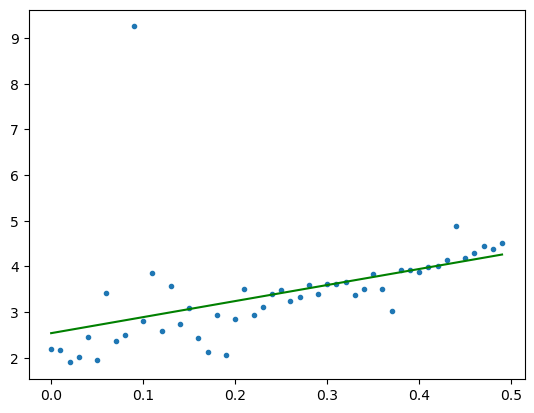

In [13]:
plt.plot(x_data[0,:], y_data[0,:],".")
plt.plot(x_data[0,:], y_dataNew[0,:],"g")
plt.show()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 945182.95it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 227176.42it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 640538.06it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



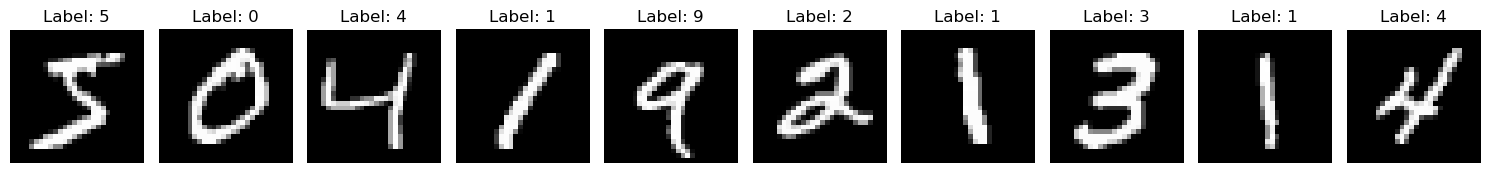

In [14]:
transform = transforms.Compose([transforms.ToTensor()])

mnist_pytorch = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_loader_pytorch = torch.utils.data.DataLoader(mnist_pytorch, batch_size=1, shuffle=False)

plt.figure(figsize=(15, 3))

for i, (image, label) in enumerate(train_loader_pytorch):
    if i < 10:
        plt.subplot(1, 10, i + 1)
        plt.imshow(image[0].squeeze(), cmap='gray')
        plt.title(f"Label: {label.item()}")
        plt.axis('off')
    else:
        break

plt.tight_layout()
plt.show()

In [17]:
torch.cuda.is_available()

False

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")